In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Завдання 1

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)"

In [3]:
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [4]:
table = soup.find('table', {'class': 'wikitable'})

In [5]:
df = pd.read_html(str(table))[0]

1

In [6]:
print(df.head())

  Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022  


2

In [7]:
print("Розмір датасета (рядки, стовпці):", df.shape)

Розмір датасета (рядки, стовпці): (210, 7)


3

In [8]:
print("Кількість стовпців у датасеті:", df.shape[1])

Кількість стовпців у датасеті: 7


In [9]:
print("Назви стовпців у датасеті:", df.columns)

Назви стовпців у датасеті: MultiIndex([( 'Country/Territory', 'Country/Territory'),
            (        'IMF[1][13]',          'Forecast'),
            (        'IMF[1][13]',              'Year'),
            (    'World Bank[14]',          'Estimate'),
            (    'World Bank[14]',              'Year'),
            ('United Nations[15]',          'Estimate'),
            ('United Nations[15]',              'Year')],
           )


In [10]:
print("Пропущені значення в стовпцях:\n", df.isnull().sum())

Пропущені значення в стовпцях:
 Country/Territory   Country/Territory    0
IMF[1][13]          Forecast             0
                    Year                 0
World Bank[14]      Estimate             0
                    Year                 0
United Nations[15]  Estimate             0
                    Year                 0
dtype: int64


4

In [11]:
df.columns = ['Country', 'MVF_2024', 'Year_MVF', 'WorldBank_2023', 'Year_WorldBank', 'OON_2022', 'Year_OON']

print("Оновлені назви стовпців:\n", df.columns)

Оновлені назви стовпців:
 Index(['Country', 'MVF_2024', 'Year_MVF', 'WorldBank_2023', 'Year_WorldBank',
       'OON_2022', 'Year_OON'],
      dtype='object')


5

In [12]:
print("Типи даних у стовпцях:\n", df.dtypes)

Типи даних у стовпцях:
 Country           object
MVF_2024          object
Year_MVF          object
WorldBank_2023    object
Year_WorldBank    object
OON_2022          object
Year_OON          object
dtype: object


6

In [13]:
import pandas as pd
import numpy as np

In [14]:
df.replace('—', np.nan, inplace=True)

In [15]:
print(df.isna().any())

Country           False
MVF_2024           True
Year_MVF           True
WorldBank_2023     True
Year_WorldBank     True
OON_2022           True
Year_OON           True
dtype: bool


In [16]:
missing_values = df.isna().sum()
print(missing_values)

Country            0
MVF_2024          15
Year_MVF          15
WorldBank_2023     8
Year_WorldBank     8
OON_2022           1
Year_OON           1
dtype: int64


In [17]:
df[['MVF_2024', 'Year_MVF', 'WorldBank_2023', 'Year_WorldBank', 'OON_2022', 'Year_OON']] = df[['MVF_2024', 'Year_MVF', 'WorldBank_2023', 'Year_WorldBank', 'OON_2022', 'Year_OON']].apply(pd.to_numeric, errors='coerce')

In [18]:
df.fillna(df.mean(), inplace=True)

C:\Users\E L I T E B O O K\AppData\Local\Temp\ipykernel_7108\820435583.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


7

In [19]:
missing_values_after = df.isna().sum()

In [20]:
print(missing_values_after)

Country           0
MVF_2024          0
Year_MVF          0
WorldBank_2023    0
Year_WorldBank    0
OON_2022          0
Year_OON          0
dtype: int64


8

In [21]:
duplicates = df.duplicated().sum()

In [22]:
print(f"Кількість дублікатів у таблиці: {duplicates}")

Кількість дублікатів у таблиці: 0


9

In [23]:
description = df.describe()
print(description)

           MVF_2024     Year_MVF  WorldBank_2023  Year_WorldBank  \
count  2.100000e+02   210.000000    2.100000e+02      210.000000   
mean   1.123228e+06  2023.962366    1.037206e+06     2022.903061   
std    7.900707e+06     0.246861    7.602076e+06        0.332873   
min    6.600000e+01  2022.000000    6.200000e+01     2021.000000   
25%    1.464775e+04  2024.000000    1.044175e+04     2023.000000   
50%    6.215800e+04  2024.000000    4.341600e+04     2023.000000   
75%    4.366365e+05  2024.000000    3.376592e+05     2023.000000   
max    1.095292e+08  2024.000000    1.054355e+08     2023.000000   

           OON_2022  Year_OON  
count  2.100000e+02     210.0  
mean   9.612699e+05    2022.0  
std    7.275608e+06       0.0  
min    5.900000e+01    2022.0  
25%    8.928250e+03    2022.0  
50%    3.210250e+04    2022.0  
75%    2.412485e+05    2022.0  
max    1.008348e+08    2022.0  


10

In [25]:
df['Deviation_MVF_WorldBank'] = df['MVF_2024'] - df['WorldBank_2023']
print(df[['Country', 'MVF_2024', 'WorldBank_2023', 'Deviation_MVF_WorldBank']].head())

         Country     MVF_2024  WorldBank_2023  Deviation_MVF_WorldBank
0          World  109529216.0     105435540.0                4093676.0
1  United States   28781083.0      27360935.0                1420148.0
2          China   18532633.0      17794782.0                 737851.0
3        Germany    4591100.0       4456081.0                 135019.0
4          Japan    4110452.0       4212945.0                -102493.0


In [26]:
largest_deviations = df[['Country', 'Deviation_MVF_WorldBank']].copy()
largest_deviations['Absolute_Deviation'] = largest_deviations['Deviation_MVF_WorldBank'].abs()
largest_deviations = largest_deviations.sort_values(by='Absolute_Deviation', ascending=False)

print(largest_deviations.head())

                      Country  Deviation_MVF_WorldBank  Absolute_Deviation
0                       World             4.093676e+06        4.093676e+06
1               United States             1.420148e+06        1.420148e+06
196  Turks and Caicos Islands             1.121826e+06        1.121826e+06
193              Sint Maarten             1.121605e+06        1.121605e+06
178                   Curaçao             1.120154e+06        1.120154e+06


Найбільше відрізняється в  United States, Turks and Caicos Islands, Sint Maarten та  Curaçao 

11

In [27]:
correlation_matrix = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].corr()
print(correlation_matrix)

                MVF_2024  WorldBank_2023  OON_2022
MVF_2024        1.000000        0.999351  0.999246
WorldBank_2023  0.999351        1.000000  0.999656
OON_2022        0.999246        0.999656  1.000000


12

In [28]:
mean_values = df[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()

print("Середнє значення для кожного стовпця:")
print(mean_values)

Середнє значення для кожного стовпця:
MVF_2024          1.123228e+06
WorldBank_2023    1.037206e+06
OON_2022          9.612699e+05
dtype: float64


In [29]:
yearly_means = df.groupby('Year_MVF')[['MVF_2024', 'WorldBank_2023', 'OON_2022']].mean()
print("Середнє значення для кожного стовпця по роках:")
print(yearly_means)

Середнє значення для кожного стовпця по роках:
                 MVF_2024  WorldBank_2023       OON_2022
Year_MVF                                                
2022.000000  3.703100e+04    3.893200e+04   43221.333333
2023.000000  3.382370e+05    3.383680e+05  326796.000000
2023.962366  1.539102e+06    9.895716e+05  824852.910686
2024.000000  1.090605e+06    1.063782e+06  997877.692308


# 13

In [30]:
std_devs = df.groupby('Country')[['MVF_2024', 'WorldBank_2023', 'OON_2022']].std()

In [31]:
std_devs['Total_Std_Dev'] = std_devs.sum(axis=1)

In [32]:
std_devs_sorted = std_devs.sort_values(by='Total_Std_Dev', ascending=False)

In [33]:
print("Країна з найвищою варіативністю у показниках між роками:")
print(std_devs_sorted.head(1))

Країна з найвищою варіативністю у показниках між роками:
             MVF_2024  WorldBank_2023  OON_2022  Total_Std_Dev
Country                                                       
Afghanistan       NaN             NaN       NaN            0.0


14

In [34]:
def find_extremes(df, column_name):
    max_country = df.loc[df[column_name].idxmax(), 'Country']
    min_country = df.loc[df[column_name].idxmin(), 'Country']
    return max_country, min_country


In [35]:
results = {}
for column in ['MVF_2024', 'WorldBank_2023', 'OON_2022']:
    max_country, min_country = find_extremes(df, column)
    results[column] = {
        'Max Country': max_country,
        'Min Country': min_country
    }


In [36]:
for column, extremes in results.items():
    print(f"Для {column}:")
    print(f"  Країна з найвищим показником: {extremes['Max Country']}")
    print(f"  Країна з найнижчим показником: {extremes['Min Country']}")

Для MVF_2024:
  Країна з найвищим показником: World
  Країна з найнижчим показником: Tuvalu
Для WorldBank_2023:
  Країна з найвищим показником: World
  Країна з найнижчим показником: Tuvalu
Для OON_2022:
  Країна з найвищим показником: World
  Країна з найнижчим показником: Tuvalu


15

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

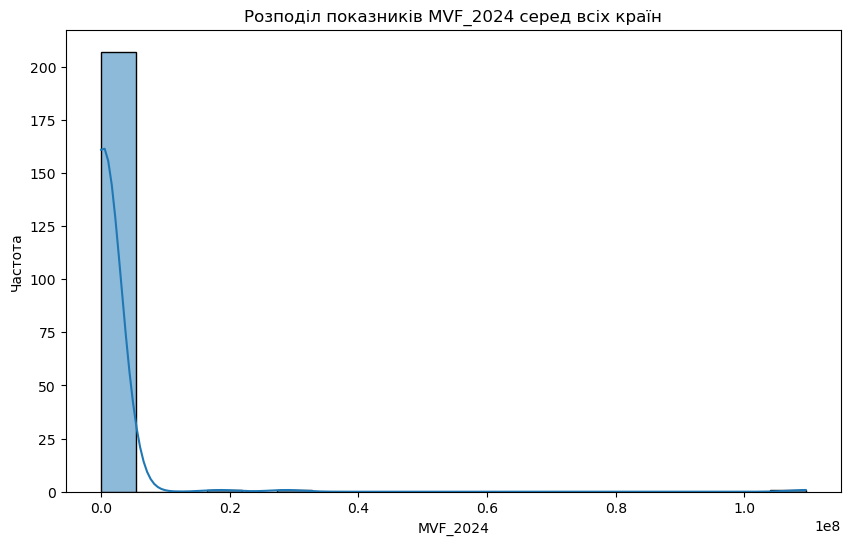

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MVF_2024'].dropna(), bins=20, kde=True)
plt.title('Розподіл показників MVF_2024 серед всіх країн')
plt.xlabel('MVF_2024')
plt.ylabel('Частота')
plt.show()

16

In [41]:
def calculate_shares(df, column_name):
    total = df[column_name].sum()
    df[f'{column_name}_Share'] = df[column_name] / total
    
for column in ['MVF_2024', 'WorldBank_2023', 'OON_2022']:
    calculate_shares(df, column)
    
print("Частки кожної країни для кожного показника:")
print(df[['Country', 'MVF_2024_Share', 'WorldBank_2023_Share', 'OON_2022_Share']])

Частки кожної країни для кожного показника:
              Country  MVF_2024_Share  WorldBank_2023_Share  OON_2022_Share
0               World    4.643473e-01          4.840638e-01    4.995119e-01
1       United States    1.220169e-01          1.256165e-01    1.275302e-01
2               China    7.856878e-02          8.169741e-02    8.898532e-02
3             Germany    1.946389e-02          2.045826e-02    2.019612e-02
4               Japan    1.742619e-02          1.934200e-02    2.096519e-02
..                ...             ...                   ...             ...
205          Kiribati    1.318479e-06          1.280914e-06    1.104690e-06
206             Palau    1.305761e-06          1.207456e-06    1.114597e-06
207  Marshall Islands    1.293042e-06          1.303869e-06    1.382100e-06
208             Nauru    6.825568e-07          7.070275e-07    7.282034e-07
209            Tuvalu    2.798059e-07          2.846475e-07    2.922721e-07

[210 rows x 4 columns]


In [42]:
yearly_shares_mvf = df.groupby('Year_MVF')['MVF_2024_Share'].mean()
yearly_shares_worldbank = df.groupby('Year_WorldBank')['WorldBank_2023_Share'].mean()
yearly_shares_oan = df.groupby('Year_OON')['OON_2022_Share'].mean()

In [43]:
print("Середні частки по роках для MVF_2024:")
print(yearly_shares_mvf)

print("\nСередні частки по роках для WorldBank_2023:")
print(yearly_shares_worldbank)

print("\nСередні частки по роках для OON_2022:")
print(yearly_shares_oan)

Середні частки по роках для MVF_2024:
Year_MVF
2022.000000    0.000157
2023.000000    0.001434
2023.962366    0.006525
2024.000000    0.004624
Name: MVF_2024_Share, dtype: float64

Середні частки по роках для WorldBank_2023:
Year_WorldBank
2021.000000    0.000022
2022.000000    0.000119
2022.903061    0.008647
2023.000000    0.004874
Name: WorldBank_2023_Share, dtype: float64

Середні частки по роках для OON_2022:
Year_OON
2022.0    0.004762
Name: OON_2022_Share, dtype: float64


З часом частки збільшуються

In [44]:
melted_df = pd.melt(df, 
                     id_vars=['Country'], 
                     value_vars=['MVF_2024', 'WorldBank_2023', 'OON_2022'],
                     var_name='Indicator', 
                     value_name='Value')


In [45]:
indicator_mapping = {
    'MVF_2024': 'MVF_2024',
    'WorldBank_2023': 'WorldBank_2023',
    'OON_2022': 'OON_2022'
}

melted_df['Indicator'] = melted_df['Indicator'].map(indicator_mapping)


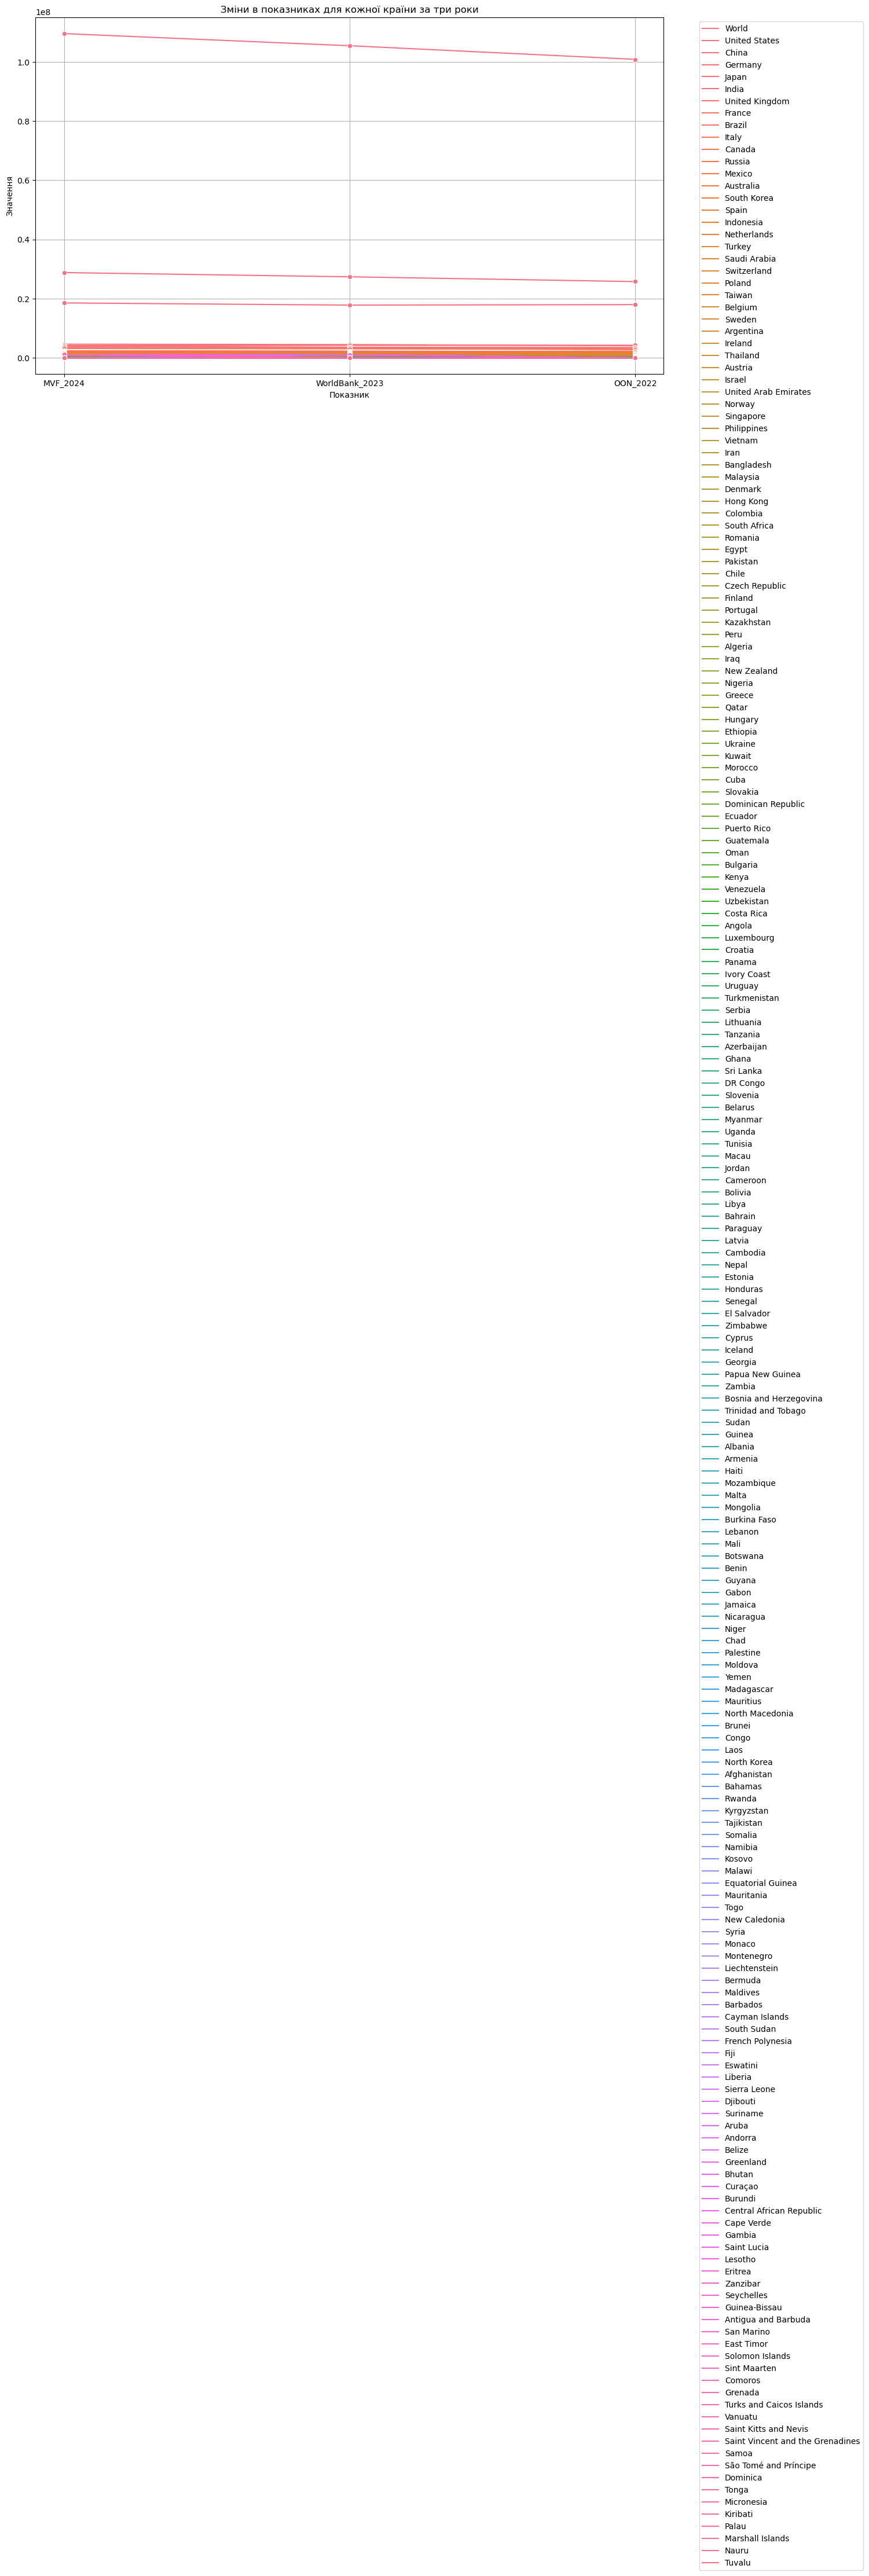

In [47]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_df, x='Indicator', y='Value', hue='Country', marker='o')

plt.title('Зміни в показниках для кожної країни за три роки')
plt.xlabel('Показник')
plt.ylabel('Значення')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()

Висновок
Обробка пропущених значень та дублікатів:

Пропущені значення у стовпцях були замінені на середнє значення відповідних показників.
Дублікатів у датасеті не було знайдено, що свідчить про унікальність записів.
Статистичний аналіз:

Описова статистика показала основні характеристики показників, такі як середні значення та стандартні відхилення. Це допомогло оцінити загальні тренди та варіації в даних.
Відхилення між показниками MVF_2024 та WorldBank_2023 були обчислені, що дозволило визначити країни з найбільшими різницями між цими показниками.
Кореляція між показниками MVF_2024, WorldBank_2023 та OON_2022 показала, які пари змінних мають найвищу кореляцію, вказуючи на можливі взаємозвязки між показниками.
Частки країн:

Частки кожної країни у загальному значенні для кожного показника були розраховані, що дозволило виявити внесок кожної країни в загальні показники. Це допомогло зрозуміти розподіл ресурсів або оцінок між країнами.
Візуалізація змін показників:

Гістограма розподілу показників MVF_2024 показала, як значення розподілені серед усіх країн. Це дозволило побачити, чи є якісь країни, що виділяються.
Лінійний графік змін показників для кожної країни за три роки продемонстрував, як показники змінюються з часом для кожної країни. Аналіз графіка допоміг визначити країни, які показують стабільне зростання або спад у показниках.